In [1]:
#seed
import random
random.seed(1234)

# Manipulating & Visualizing Data
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})

# Feature Scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Categorical Encoding
import category_encoders as ce

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold


# ML Models
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model 

# Ensemble Learning
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import BaggingRegressor

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Performance metrics
import sklearn.metrics as skm

## Loading the dataset
df = pd.read_csv("PricePrediction_DataSet.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
## Data Description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From the data description above, we can draw some observations.

The dataset comprises 1460 rows and 80 columns, making it relatively small, hence it would not be computationally intensive.

For null values, most columns appear to have no missing values, while null values make up to 80% for some of the variables. It indicates that we should proceed with data cleaning before applying machine learning.

In terms of variable type, it is mostly int64, float64, and object. Though 'object' can be interpreted as text or categorical, we can investigate it in feature engineering.

In [3]:
## Dataset Statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The table above captures the basic descriptive statistics which shows things like mean, standard deviation, min, max, etc..

In [4]:
# exploring target variable
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The house sale prices in this dataset have a right-skewed distribution with outliers on the upper end, indicating luxury houses with higher price points. However, most houses appear to fall between ~100k and ~300k.

In [5]:
## No. of null values
null_vals = df.isna().sum().sum()

# List of columns with missing values
null_cols = df.columns[df.isna().any()].tolist()

for i in null_cols:
    col_null = df[i].isnull().sum()
    per_null = col_null / len(df[i])
    print("  - {}: {} ({:.2%})".format(i, col_null, per_null))

  - LotFrontage: 259 (17.74%)
  - Alley: 1369 (93.77%)
  - MasVnrType: 8 (0.55%)
  - MasVnrArea: 8 (0.55%)
  - BsmtQual: 37 (2.53%)
  - BsmtCond: 37 (2.53%)
  - BsmtExposure: 38 (2.60%)
  - BsmtFinType1: 37 (2.53%)
  - BsmtFinType2: 38 (2.60%)
  - Electrical: 1 (0.07%)
  - FireplaceQu: 690 (47.26%)
  - GarageType: 81 (5.55%)
  - GarageYrBlt: 81 (5.55%)
  - GarageFinish: 81 (5.55%)
  - GarageQual: 81 (5.55%)
  - GarageCond: 81 (5.55%)
  - PoolQC: 1453 (99.52%)
  - Fence: 1179 (80.75%)
  - MiscFeature: 1406 (96.30%)


Given that 'LotFrontage' is one of those characteristics all houses have, the null values indicate missing information that cannot just be equal to 0. Since we cannot get more data, we can use imputation methods for this column and other ones which may require them.

Before proceeding to the imputation, we can investigate possible differences in distribution grouped by Lot shape.

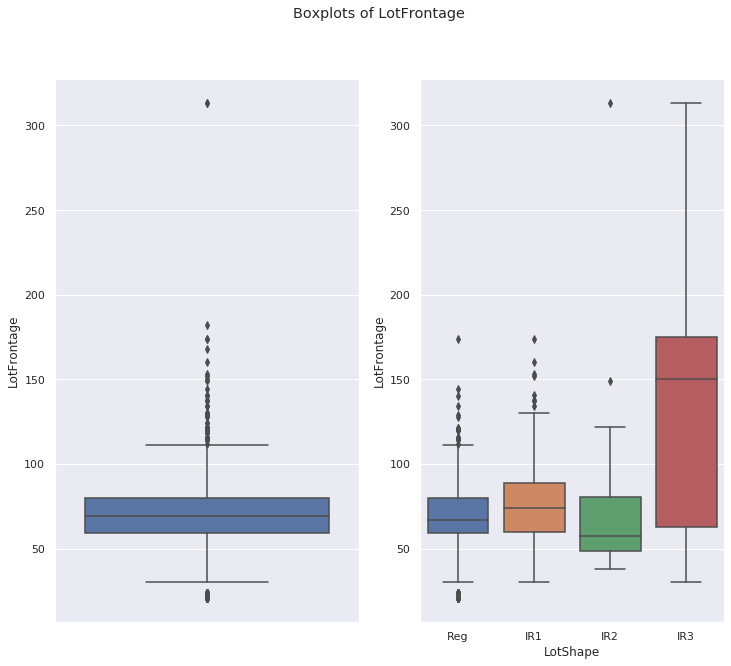

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Boxplots of LotFrontage')
sns.boxplot(ax=ax1, data=df, y="LotFrontage", orient = "v")
sns.boxplot(ax=ax2, data=df, x="LotShape", y="LotFrontage", orient = "v")
plt.show()

In [7]:
# Calculating mean and median by grouping the values Lotshape
for i in df["LotShape"].unique().tolist():
    df_i = df[df["LotShape"]==i]
    mean_frontage = df_i['LotFrontage'].mean()
    median_frontage = df_i['LotFrontage'].median()
    print(" -{}, mean LotFrontage = {:.2f} and median LotFrontage = {:.2f}".format(i,
                                                                            mean_frontage,
                                                                            median_frontage))

 -Reg, mean LotFrontage = 67.04 and median LotFrontage = 67.00
 -IR1, mean LotFrontage = 76.09 and median LotFrontage = 74.00
 -IR2, mean LotFrontage = 76.50 and median LotFrontage = 57.50
 -IR3, mean LotFrontage = 138.43 and median LotFrontage = 150.00


In [8]:
# Imputation using group by
df['LotFrontage'] = df.groupby('LotShape').LotFrontage.transform(lambda x: x.fillna(x.median()))
df.LotFrontage = df.LotFrontage.round(2)
df['LotFrontage'].isnull().sum()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The boxplots indicate the presence of outliers in the data with massive and small houses by widths. When broken down by 'LotShape', we also observe a notable difference in those houses categorized as IR3, in other words, of very irregular shape. In light of both the outliers and category differences, we can use the median value grouped by LotShape for the imputation process to ensure consistency in the data.

In [9]:
# Replacing the null values of categorical values
df['Alley'].fillna("No alley access", inplace = True)
df['Alley'].value_counts()

No alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [10]:
for i in null_cols:
    # Grouping of variables dependent on the presence of a basement
    if 'Bsmt' in i:
        df[i].fillna("No Basement", inplace = True)
        
    # Grouping of variables dependent on the presence of a garage
    elif 'Garage' in i:
        if i == 'GarageYrBlt':
            df[i].fillna(0, inplace = True)
        else:
            df[i].fillna("No Garage", inplace = True)

In [11]:
other_cols_imp = {
    'MasVnrType': 'No Veneer',
    'MasVnrArea': 0, 
    'FireplaceQu': 'No Fireplace', 
    'PoolQC': 'No Pool', 
    'Fence': 'No Fence', 
    'MiscFeature': 'No Misc'
   }

# Grouping of variables dependent on the presence of other values
for i, j in other_cols_imp.items():
    df[i].fillna(j, inplace = True)

In [12]:
# Deleting Electrical 
df.dropna(subset=['Electrical'], inplace=True)

In [13]:
## No. of null values
null_vals = df.isna().sum().sum()

# Reporting back
print("Afer imputation, {:d} values in the data.".format(null_vals))

Afer imputation, 0 values in the data.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


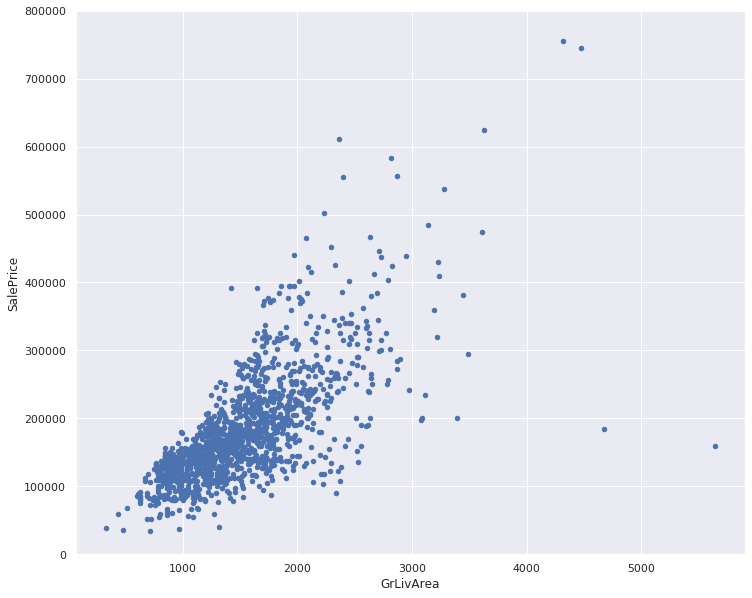

In [14]:
#Outliers 

var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

In [15]:
#deleting points
df.sort_values(by = 'GrLivArea', ascending = False)[:2]
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 524].index)

/home/kusumapani/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


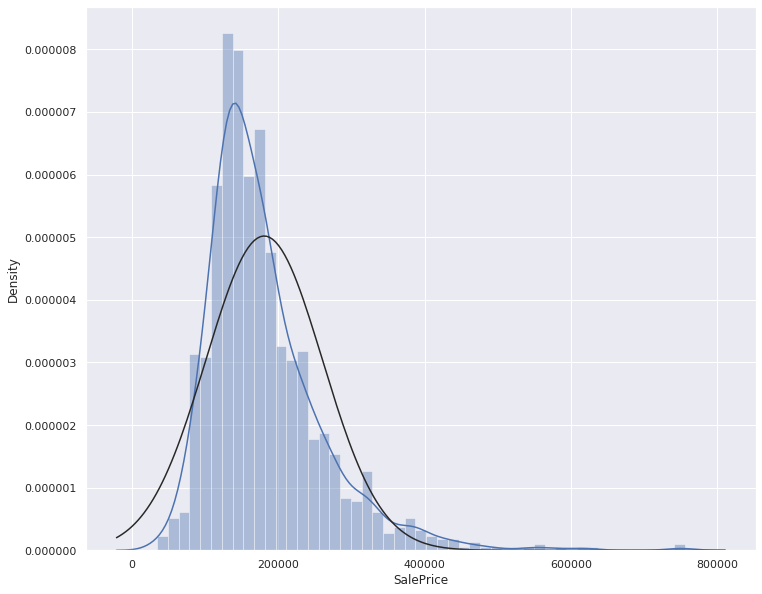

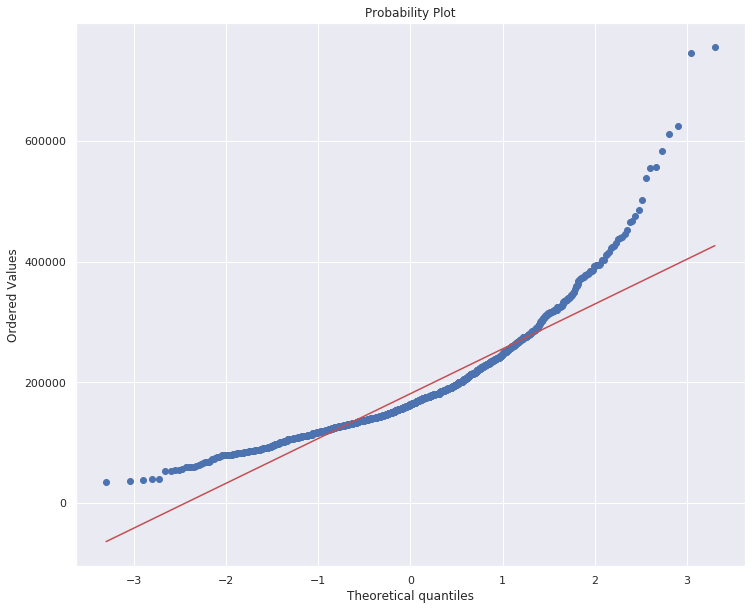

In [16]:
#Normality plot

sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

The target variable is not normal. It shows skewness and does not follow the diagonal line.

Applying log transformations usually works well.

In [17]:
#applying log transformation
df['SalePrice'] = np.log(df['SalePrice'])


/home/kusumapani/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


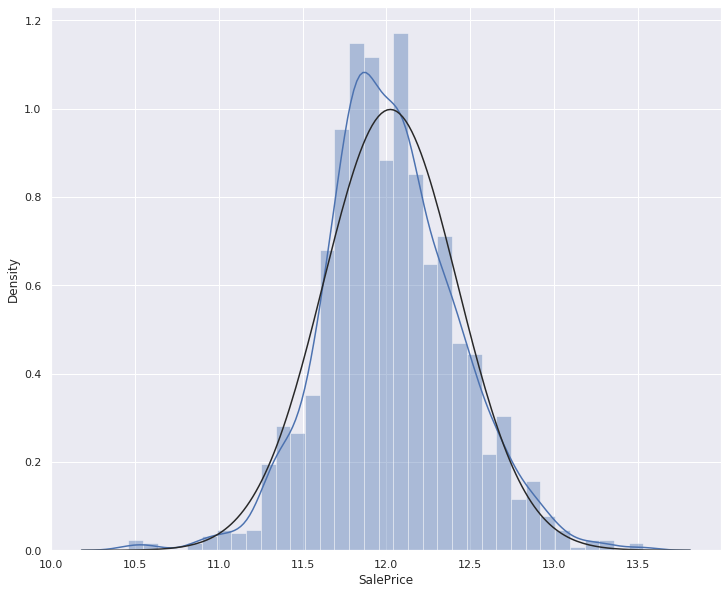

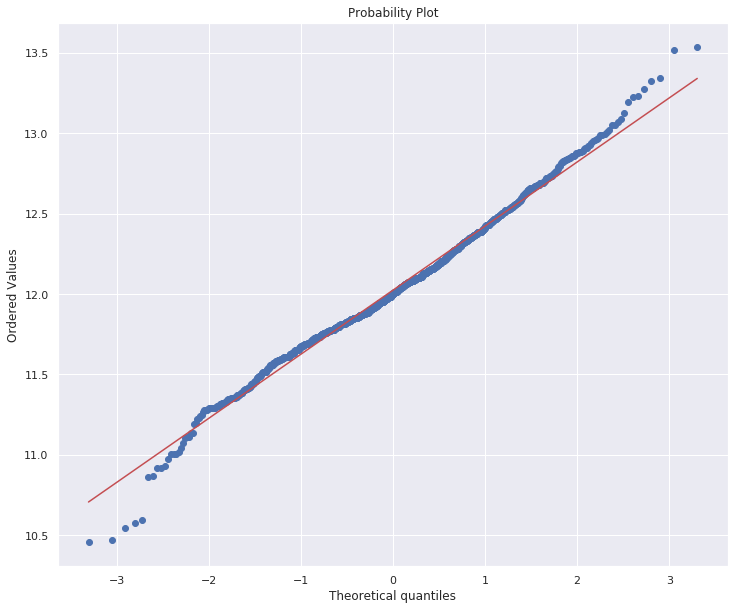

In [18]:
#transformed plot
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

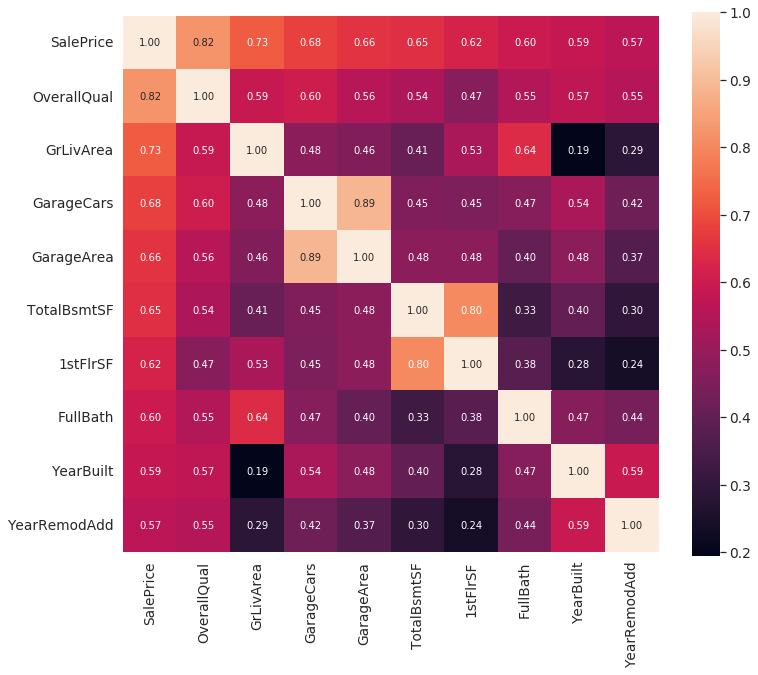

In [19]:
#saleprice correlation matrix
corrmat = df.corr()
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

1.'OverallQual', 'GrLivArea' are strongly correlated with 'SalePrice'.
 
2.'GarageCars' and 'GarageArea' are almost the same. we will never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
 
3.'TotalBsmtSF' and '1stFloor' are also similar corelations.

4.Among all the detected, 'OverallQual' appears to be a key variable that is highly correlated to the sale price of the house. It probably falls inline with our expectations in terms of the valuation process of a house.



In [20]:
#Feature Engineering 

#converting categorical values using one hot encoding

# Encoding binary categorical variables
binary = ['CentralAir']

# Applying binary encoder
binenc = ce.BinaryEncoder(cols = binary, return_df = True)
bin_df = binenc.fit_transform(df)  
bin_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No Misc,0,12,2008,WD,Normal,12.429216


In [21]:
cardinal = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotConfig', 
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
            'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
            'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 
            'Functional', 'GarageType', 'MiscFeature', 'SaleType', 
            'SaleCondition']


# Applying one-hot encoder 
ohe = ce.OneHotEncoder(cols = cardinal, use_cat_names=True, return_df = True)
df_card_enc = ohe.fit_transform(bin_df)  
df_card_enc.head()

,Id,MSSubClass_60.0,MSSubClass_20.0,MSSubClass_70.0,MSSubClass_50.0,MSSubClass_190.0,MSSubClass_45.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_30.0,...,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SalePrice
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,12.247694
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,12.109011
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,12.317167
3,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,11.849398
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,12.429216


In [22]:
# Encoding cardinal categorical variables
ordinal_cols_mapping = [ 
    {"col" : 'LotShape', "mapping": {'Reg':0, 'IR1': 1, 'IR2':2, 'IR3':3}},
    {"col" : 'LandContour', "mapping": {'Low':0, 'Lvl':1, 'Bnk':2, 'HLS':3}},
    {"col" : 'Utilities', "mapping": {'ELO':0, 'NoSeWa':1, 'NoSewr':2, 'AllPub':3}},
    {"col" : 'LandSlope', "mapping": {'Gtl': 0, 'Mod': 1, 'Sev':2}},
    {"col" : 'OverallQual', "mapping": {1: 0, 2: 1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7, 9:8, 10:9}},
    {"col" : 'OverallCond', "mapping": {1: 0, 2: 1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7, 9:8, 10:9}},
    {"col" : 'ExterQual', "mapping": {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}},
    {"col" : 'ExterCond', "mapping": {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}},
    {"col" : 'BsmtQual', "mapping": {'No Basement':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}},
    {"col" : 'BsmtCond', "mapping": {'No Basement':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}},   
    {"col" : 'BsmtExposure', "mapping": {'No Basement':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}},
    {"col" : 'BsmtFinType1', "mapping": {'No Basement':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}}, 
    {"col" : 'BsmtFinType2', "mapping": {'No Basement':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}},  
    {"col" : 'HeatingQC', "mapping": {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}},
    {"col" : 'KitchenQual', "mapping": {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}},
    {"col" : 'FireplaceQu', "mapping": {'No Fireplace':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}},
    {"col" : 'GarageFinish', "mapping": {'No Garage':0, 'Unf':1, 'RFn':2, 'Fin':3}},
    {"col" : 'GarageQual', "mapping": {'No Garage':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}},
    {"col" : 'GarageCond', "mapping": {'No Garage':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}},
    {"col" : 'PavedDrive', "mapping": {'N':0, 'P':1, 'Y':2}}, 
    {"col" : 'PoolQC', "mapping": {'No Pool':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}},
    {"col" : 'Fence', "mapping":{'No Fence':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}}
]

# Applying ordinal encoder
ordenc = ce.OrdinalEncoder(mapping = ordinal_cols_mapping, return_df = True)
df_ord_enc = ordenc.fit_transform(df_card_enc)  
df_ord_enc.head()

,Id,MSSubClass_60.0,MSSubClass_20.0,MSSubClass_70.0,MSSubClass_50.0,MSSubClass_190.0,MSSubClass_45.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_30.0,...,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SalePrice
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,12.247694
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,12.109011
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,12.317167
3,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,11.849398
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,12.429216


In [23]:
# Splitting features & target variable
X = df_ord_enc.drop(['SalePrice'], axis=1).values
y = df_ord_enc['SalePrice'].values
y_log = np.log(y)

In [24]:
## Training Testing Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, 
                                                    test_size=1/3, 
                                                    random_state=0)


In [25]:
ensemble_models = {
    'RF': RandomForestRegressor(),
    'XGBoost': BaggingRegressor(base_estimator=xgb.XGBRegressor()),
}

In [26]:
# Model Building & performance evaluation
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)

for name, model in ensemble_models.items():
    model_errs = []
    for train_index, test_index in kf.split(X_train):
        X_train_k = X_train[train_index] 
        y_train_k = y_train[train_index]
        model.fit(X_train_k, y_train_k)
        pred_log = model.predict(X_train_k)
        #pred = np.exp(pred_log)
        rmsle = skm.mean_squared_error(y_train_k, pred_log, squared=False) 
        model_errs.append(rmsle)
        # report performance
    print('{} - RMSLE: {:.5f}' .format(name, np.mean(model_errs), 
                                               np.std(model_errs)))

RF - RMSLE: 0.00465
XGBoost - RMSLE: 0.00468


In [27]:
## Random Search
# Define the model
model = RandomForestRegressor()
# search space
rf_space = {
   'n_estimators': range(20, 100, 20),
   'max_depth': range(3, 15, 3),
   'min_samples_split': [2, 5, 10], 
   'min_samples_leaf': [1, 2, 4]
}

In [28]:
search = GridSearchCV(estimator=model, param_grid=rf_space, 
                      cv=2, scoring='neg_root_mean_squared_error')
search.fit(X_train, y_train)
print('RF - RMSE of log values: {:.5f}' .format(search.best_score_))
print('with best parameters: {}.\n' .format(search.best_params_))

RF - RMSE of log values: -0.01276
with best parameters: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}.



In [29]:
# Running on test data
tree = RandomForestRegressor(n_estimators=60, max_depth=12, 
                              min_samples_leaf=2, min_samples_split=5)
tree.fit(X_train, y_train)
y_pred_log = tree.predict(X_test)
rmsle = skm.mean_squared_error(y_test, y_pred_log, squared=False) 
# report performance
print('RF - RMSE of log values: {:.5f}' .format(rmsle))

RF - RMSE of log values: 0.01101
